In [1]:
import itertools as it
import os

from cliffs_delta import cliffs_delta
from iterpop import iterpop as ip
from matplotlib import pyplot as plt
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
from scipy import stats as scipy_stats
import seaborn as sns
from teeplot import teeplot as tp

from pylib import describe_effect


In [2]:
# prints metadata about notebook runtime
nbm.print_metadata()


context: ci
hostname: fv-az529-345
interpreter: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
nbcellexec: null
nbname: perfect-tree-phylometrics
nbpath: /home/runner/work/hstrat-evolutionary-inference/hstrat-evolutionary-inference/binder/gen3sis/perfect-tree-phylometrics.ipynb
revision: null
session: 18ee1dd8-ff97-4449-9baa-076d0f4112e1
timestamp: 2024-03-25T22:51:54Z00:00


IPython==8.13.0
keyname==0.5.2
yaml==6.0
iterpop==0.4.1
matplotlib==3.7.1
nbmetalog==0.2.6
numpy==1.21.6
pandas==1.3.5
scipy==1.7.3
seaborn==0.12.1
teeplot==1.0.1
re==2.2.1
comm==0.2.2
logging==0.5.1.2
psutil==5.9.8
zmq==24.0.1
json==2.0.9
ipykernel==6.29.3


In [3]:
df = pd.read_csv("https://osf.io/w3q9v/download")
dfdigest = np.bitwise_xor.reduce(
    pd.util.hash_pandas_object(df),
)
print("{:x}".format(dfdigest))
df


ed37eeda6aa5f9a6


,a,epoch,mut_distn,treatment,seed,plain,phy.nex,_,colless_like_index,average_depth,...,variance_evolutionary_distinctiveness,spatial_plain,ecology,spatial_ecology,latest,resolution,subsampling_fraction,subsampling-fraction,trie-postprocess,ext
0,collapsed-phylogeny,0,default,plain,21,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,1826.834415,21.344978,...,9.999499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,collapsed-phylogeny,0,default,spatial_plain,114,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,6233.179436,26.352574,...,5.002667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,collapsed-phylogeny,0,default,ecology,36,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,2996.671817,22.634006,...,2.999362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,collapsed-phylogeny,0,default,ecology,37,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,8880.303327,27.944778,...,2.169374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,collapsed-phylogeny,0,default,spatial_plain,96,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,6115.812979,24.076607,...,3.468459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,reconstructed-tree,0,default,plain,5,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,240.172886,7.657895,...,10.075515,NaN,NaN,NaN,NaN,3.0,1.0,1.0,naive,.csv.gz
596,reconstructed-tree,0,default,plain,30,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,274.933010,8.883562,...,11.635637,NaN,NaN,NaN,NaN,33.0,1.0,1.0,naive,.csv.gz
597,reconstructed-tree,0,default,plain,16,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,737.478160,11.417241,...,9.481669,NaN,NaN,NaN,NaN,33.0,1.0,1.0,naive,.csv.gz
598,reconstructed-tree,0,default,spatial_ecology,67,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,31548.145509,15.225632,...,1.583985,NaN,NaN,NaN,NaN,3.0,1.0,1.0,naive,.csv.gz


In [4]:
# phylometrics whittled down to descriptive, non-redundant set
df["colless-like index"] = df["colless_like_index"]
df["mean pairwise distance"] = df["mean_pairwise_distance"]
df["sum distance"] = df["sum_distance"]
df["mean evolutionary distinctiveness"] = df[
    "mean_evolutionary_distinctiveness"
]

phylometrics = [
    #     'diversity',
    "colless-like index",
    #     'average_depth',
    #     'average_origin_time',
    #     'average_origin_time_normalized',
    #     'max_depth',
    "mean pairwise distance",
    #     'mean_pairwise_distance_branch_only',
    #     'num_active',
    "sum distance",
    # "num_ancestors",
    #     'num_outside',
    #     'num_roots',
    #     'num_taxa',
    #     'phylogenetic_diversity',
    #     'sum_pairwise_distance',
    #     'sum_pairwise_distance_branch_only',
    #     'total_orgs',
    #     'tree_size',
    #     'variance_pairwise_distance',
    #     'variance_pairwise_distance_branch_only',
    #     'mrca_depth',
    #     'sackin_index',
    "mean evolutionary distinctiveness",
    #     'sum_evolutionary_distinctiveness',
    #     'variance_evolutionary_distinctiveness',
]


In [5]:
methodological_variables = [
    "resolution",
]


In [6]:
evolutionary_variables = [
    "num_islands",
    "num_niches",
    "tournament_size",
    "p_niche_invasion",
]


In [7]:
sensitivity_analysis_variables = [
    "epoch",
    "mut_distn",
]


In [8]:
fixed_variables = [
    "subsampling-fraction",  # only use 1.0
    "trie-postprocess",  # just use naive postprocessing for now
]


In [9]:
# ensure fixed variables
df = df[
    ((df["subsampling-fraction"] == 1.0) | df["subsampling-fraction"].isna())
    & ((df["trie-postprocess"] == "naive") | df["trie-postprocess"].isna())
].copy()

for fixed_variable in fixed_variables:
    assert len(df[fixed_variable].dropna().unique()) == 1

df


,a,epoch,mut_distn,treatment,seed,plain,phy.nex,_,colless_like_index,average_depth,...,latest,resolution,subsampling_fraction,subsampling-fraction,trie-postprocess,ext,colless-like index,mean pairwise distance,sum distance,mean evolutionary distinctiveness
0,collapsed-phylogeny,0,default,plain,21,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,1826.834415,21.344978,...,NaN,NaN,NaN,NaN,NaN,NaN,1826.834415,16.569677,1590.0,6.943231
1,collapsed-phylogeny,0,default,spatial_plain,114,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,6233.179436,26.352574,...,NaN,NaN,NaN,NaN,NaN,NaN,6233.179436,19.023128,3192.0,4.979719
2,collapsed-phylogeny,0,default,ecology,36,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,2996.671817,22.634006,...,NaN,NaN,NaN,NaN,NaN,NaN,2996.671817,18.679815,1362.0,3.942363
3,collapsed-phylogeny,0,default,ecology,37,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,8880.303327,27.944778,...,NaN,NaN,NaN,NaN,NaN,NaN,8880.303327,21.099940,2689.0,3.319328
4,collapsed-phylogeny,0,default,spatial_plain,96,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,6115.812979,24.076607,...,NaN,NaN,NaN,NaN,NaN,NaN,6115.812979,20.331001,3592.0,4.913817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,reconstructed-tree,0,default,plain,5,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,240.172886,7.657895,...,NaN,3.0,1.0,1.0,naive,.csv.gz,240.172886,9.527652,1356.0,7.136842
596,reconstructed-tree,0,default,plain,30,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,274.933010,8.883562,...,NaN,33.0,1.0,1.0,naive,.csv.gz,274.933010,10.433821,994.0,6.808219
597,reconstructed-tree,0,default,plain,16,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,737.478160,11.417241,...,NaN,33.0,1.0,1.0,naive,.csv.gz,737.478160,12.818017,1665.0,5.741379
598,reconstructed-tree,0,default,spatial_ecology,67,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,31548.145509,15.225632,...,NaN,3.0,1.0,1.0,naive,.csv.gz,31548.145509,19.932652,17606.5,2.184947


In [10]:
# exclude extraneous variable values
df = df[(df["a"] == "collapsed-phylogeny")].copy()

df


,a,epoch,mut_distn,treatment,seed,plain,phy.nex,_,colless_like_index,average_depth,...,latest,resolution,subsampling_fraction,subsampling-fraction,trie-postprocess,ext,colless-like index,mean pairwise distance,sum distance,mean evolutionary distinctiveness
0,collapsed-phylogeny,0,default,plain,21,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,1826.834415,21.344978,...,NaN,NaN,NaN,NaN,NaN,NaN,1826.834415,16.569677,1590.0,6.943231
1,collapsed-phylogeny,0,default,spatial_plain,114,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,6233.179436,26.352574,...,NaN,NaN,NaN,NaN,NaN,NaN,6233.179436,19.023128,3192.0,4.979719
2,collapsed-phylogeny,0,default,ecology,36,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,2996.671817,22.634006,...,NaN,NaN,NaN,NaN,NaN,NaN,2996.671817,18.679815,1362.0,3.942363
3,collapsed-phylogeny,0,default,ecology,37,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,8880.303327,27.944778,...,NaN,NaN,NaN,NaN,NaN,NaN,8880.303327,21.099940,2689.0,3.319328
4,collapsed-phylogeny,0,default,spatial_plain,96,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,6115.812979,24.076607,...,NaN,NaN,NaN,NaN,NaN,NaN,6115.812979,20.331001,3592.0,4.913817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,collapsed-phylogeny,0,default,spatial_ecology,74,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,36699.980765,33.446545,...,NaN,NaN,NaN,NaN,NaN,NaN,36699.980765,29.360599,5416.0,2.041818
116,collapsed-phylogeny,0,default,spatial_plain,103,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,10786.232528,28.006042,...,NaN,NaN,NaN,NaN,NaN,NaN,10786.232528,21.340675,4870.0,4.904330
117,collapsed-phylogeny,0,default,spatial_plain,112,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,5847.911284,24.448541,...,NaN,NaN,NaN,NaN,NaN,NaN,5847.911284,20.798138,3235.0,4.969278
118,collapsed-phylogeny,0,default,spatial_ecology,89,NaN,NaN,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,92353.368588,38.991665,...,NaN,NaN,NaN,NaN,NaN,NaN,92353.368588,32.976910,10902.0,2.069693


In [11]:
df["a"].unique()


array(['collapsed-phylogeny'], dtype=object)

In [12]:
df["treatment"].unique()


array(['plain', 'spatial_plain', 'ecology', 'spatial_ecology'],
      dtype=object)

In [13]:
df["regime"] = df["treatment"].map(
    {
        "plain": "plain",
        "spatial_plain": "spatial structure",
        "ecology": "ecology",
        "spatial_ecology": "ecology + spatial",
    },
)
df["regime"].unique()


array(['plain', 'spatial structure', 'ecology', 'ecology + spatial'],
      dtype=object)

In [14]:
df[df["a"] == "collapsed-phylogeny"]["regime"].unique()


array(['plain', 'spatial structure', 'ecology', 'ecology + spatial'],
      dtype=object)

# Phylometrics by Regime, Perfect Data


In [15]:
melted_df = df[(df["a"] == "collapsed-phylogeny")].melt(
    id_vars=(
        # evolutionary_variables
        # methodological_variables
        sensitivity_analysis_variables
        + ["regime"]
    ),
    value_vars=phylometrics,
)
melted_df["phylometric"] = melted_df["variable"]
melted_df


,epoch,mut_distn,regime,variable,value,phylometric
0,0,default,plain,colless-like index,1826.834415,colless-like index
1,0,default,spatial structure,colless-like index,6233.179436,colless-like index
2,0,default,ecology,colless-like index,2996.671817,colless-like index
3,0,default,ecology,colless-like index,8880.303327,colless-like index
4,0,default,spatial structure,colless-like index,6115.812979,colless-like index
...,...,...,...,...,...,...
475,0,default,ecology + spatial,mean evolutionary distinctiveness,2.041818,mean evolutionary distinctiveness
476,0,default,spatial structure,mean evolutionary distinctiveness,4.904330,mean evolutionary distinctiveness
477,0,default,spatial structure,mean evolutionary distinctiveness,4.969278,mean evolutionary distinctiveness
478,0,default,ecology + spatial,mean evolutionary distinctiveness,2.069693,mean evolutionary distinctiveness


teeplots/col=phylometric+epoch=0+mut_distn=default+viz=barplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=default+viz=barplot+x=value+y=regime+ext=.png


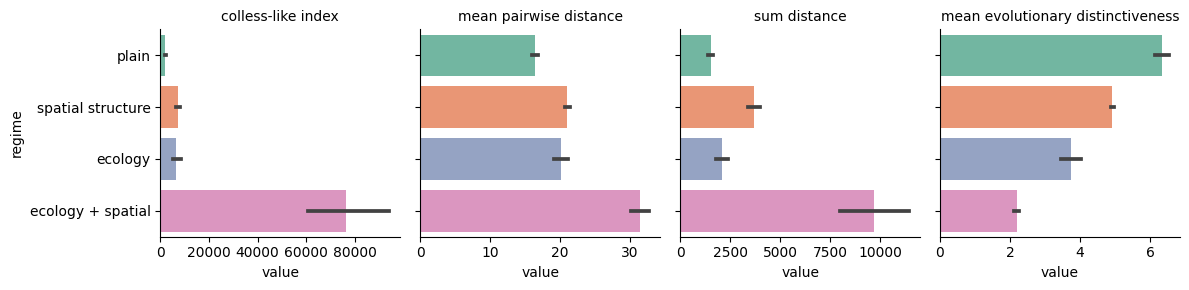

teeplots/col=phylometric+epoch=0+mut_distn=default+viz=boxplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=default+viz=boxplot+x=value+y=regime+ext=.png


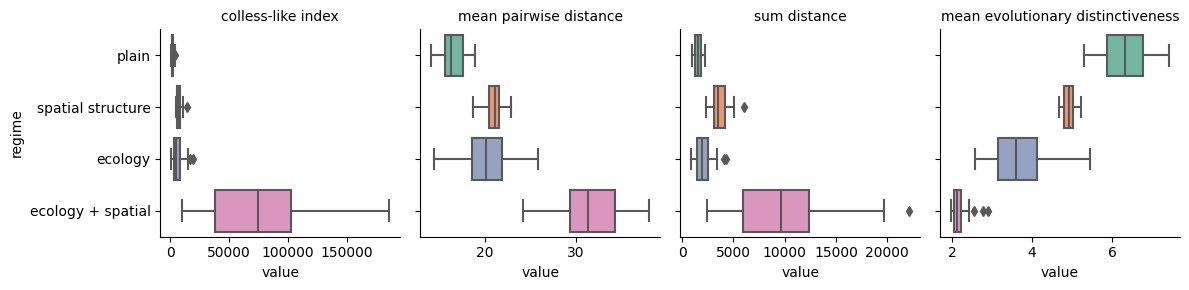

teeplots/col=phylometric+epoch=0+mut_distn=default+viz=violinplot+x=value+y=regime+ext=.pdf


teeplots/col=phylometric+epoch=0+mut_distn=default+viz=violinplot+x=value+y=regime+ext=.png


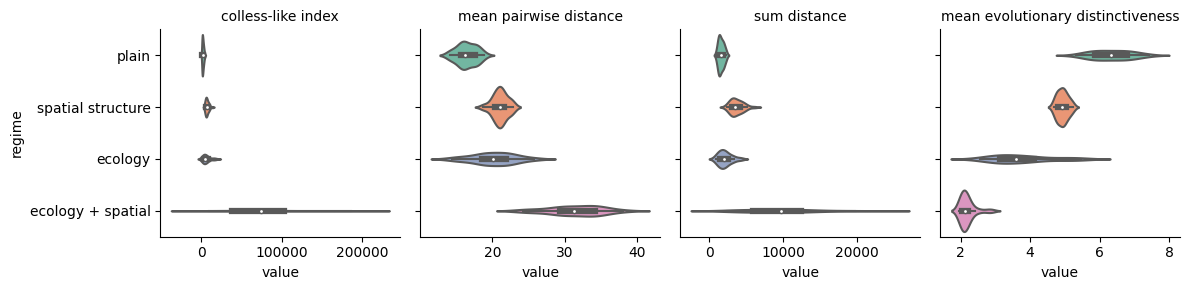

In [16]:
def make_do_plot(plotter):
    def do_plot(data, col, x, y):
        g = sns.FacetGrid(
            data,
            col=col,
            sharex=False,
        ).set_titles(template="{col_name}")
        g.map(
            plotter,
            x,
            y,
            order=[
                "plain",
                "spatial structure",
                "ecology",
                "ecology + spatial",
            ],
            palette=sns.color_palette("Set2", 4),
        )

    return do_plot


for viz, (group, group_df) in it.product(
    [
        sns.barplot,
        sns.boxplot,
        sns.violinplot,
    ],
    melted_df.groupby(sensitivity_analysis_variables),
):
    do_plot = make_do_plot(viz)
    do_plot.__name__ = viz.__name__
    tp.tee(
        do_plot,
        data=group_df,
        col="phylometric",
        x="value",
        y="regime",
        teeplot_outattrs=dict(
            zip(sensitivity_analysis_variables, group),
        ),
    )


# regime heatmap signatures

## non-spatial


teeplots/epoch=0+mut_distn=default+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=0+mut_distn=default+viz=heatmap+x=regime+y=phylometric+ext=.png


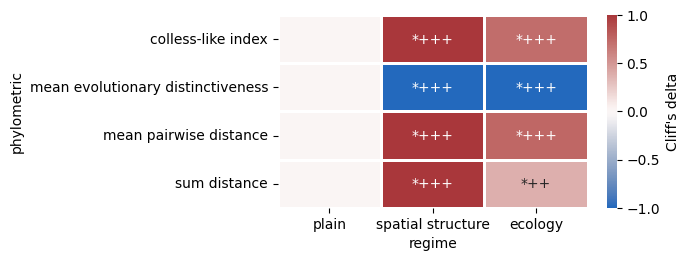

In [17]:
for (group, group_df) in df[
    df["regime"].isin(
        [
            "plain",
            "spatial structure",
            "ecology",
        ],
    )
].groupby(sensitivity_analysis_variables):

    fil = (
        group_df[(group_df["a"] == "collapsed-phylogeny")]
        .copy()
        .dropna(subset=["regime"])
    )

    melted_df = fil.melt(
        id_vars=["regime"],
        value_vars=phylometrics,
    )
    melted_df["phylometric"] = melted_df["variable"]

    def calc_cliffs_delta(group) -> float:
        phylometric, regime = group.name
        return -cliffs_delta(
            fil[fil["regime"] == "plain"][phylometric],
            fil[fil["regime"] == regime][phylometric],
        )[0]

    melted_df = melted_df.groupby(["phylometric", "regime"]).apply(
        calc_cliffs_delta,
    ).reset_index(name="value")

    fig, ax = plt.subplots(figsize=(5, 2.5))

    matrix = melted_df.pivot(
        index="phylometric",
        columns="regime",
        values="value",
    )
    matrix = matrix[
        sorted(
            matrix.columns,
            key=[
                "plain",
                "spatial structure",
                "ecology",
            ].index,
        )
    ]

    annot = []
    for metric, row in matrix.iterrows():

        def getvec(regime: str) -> np.array:
            return fil[fil["regime"] == regime][metric].to_numpy()

        annot.append(
            [
                describe_effect(getvec("plain"), getvec(regime))
                for regime in matrix.columns
            ],
        )

    tp.tee(
        sns.heatmap,
        matrix,
        annot=annot,
        fmt="",
        linewidths=2,
        cmap=sns.color_palette("vlag", as_cmap=True),
        center=0,
        cbar_kws={"label": "Cliff's delta"},
        teeplot_outattrs={
            **dict(
                zip(sensitivity_analysis_variables, group),
            ),
            **{
                "x": "regime",
                "y": "phylometric",
            },
        },
        teeplot_outexclude=["fmt"],
        vmin=-1,
        vmax=1,
    )


## spatial


teeplots/epoch=0+mut_distn=default+spatial=true+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/epoch=0+mut_distn=default+spatial=true+viz=heatmap+x=regime+y=phylometric+ext=.png


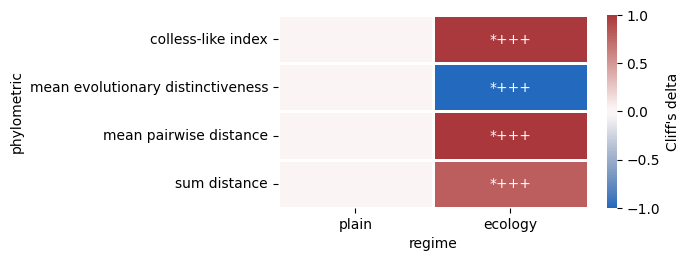

In [18]:
for (group, group_df) in df[
    df["regime"].isin(
        [
            "spatial structure",
            "ecology + spatial",
        ],
    )
].groupby(sensitivity_analysis_variables):

    fil = (
        group_df[(group_df["a"] == "collapsed-phylogeny")]
        .copy()
        .dropna(subset=["regime"])
    )
    fil["regime"] = fil["regime"].map(
        {
            "spatial structure": "plain",
            "ecology + spatial": "ecology",
        }
    )

    melted_df = fil.melt(
        id_vars=["regime"],
        value_vars=phylometrics,
    )
    melted_df["phylometric"] = melted_df["variable"]

    def calc_cliffs_delta(group) -> float:
        phylometric, regime = group.name
        return -cliffs_delta(
            fil[fil["regime"] == "plain"][phylometric],
            fil[fil["regime"] == regime][phylometric],
        )[0]

    melted_df = melted_df.groupby(["phylometric", "regime"]).apply(
        calc_cliffs_delta,
    ).reset_index(name="value")


    fig, ax = plt.subplots(figsize=(5, 2.5))

    matrix = melted_df.pivot(
        index="phylometric",
        columns="regime",
        values="value",
    )
    matrix = matrix[
        sorted(
            matrix.columns,
            key=[
                "plain",
                "ecology",
            ].index,
        )
    ]

    annot = []
    for metric, row in matrix.iterrows():

        def getvec(regime: str) -> np.array:
            return fil[fil["regime"] == regime][metric].to_numpy()

        annot.append(
            [
                describe_effect(getvec("plain"), getvec(regime))
                for regime in matrix.columns
            ],
        )


    tp.tee(
        sns.heatmap,
        matrix,
        annot=annot,
        fmt="",
        linewidths=2,
        cmap=sns.color_palette("vlag", as_cmap=True),
        center=0,
        cbar_kws={"label": "Cliff's delta"},
        teeplot_outattrs={
            **dict(
                zip(sensitivity_analysis_variables, group),
            ),
            **{
                "spatial": "true",
                "x": "regime",
                "y": "phylometric",
            },
        },
        teeplot_outexclude=["fmt"],
        vmin=-1,
        vmax=1,
    )


# stats: kruskal-wallis


In [19]:
records = []
for phylometric in phylometrics:
    for group, group_df in df.groupby(
        sensitivity_analysis_variables, as_index=False
    ):
        kw_result, n = scipy_stats.kruskal(
            *(
                quality_series
                for quality, quality_series in group_df.groupby(["regime"])[
                    phylometric
                ]
            )
        ), ip.pophomogeneous(group_df.groupby(["regime"]).count()["a"])
        records.append(
            {
                **{
                    "n": n,
                    "N": len([*group_df.groupby(["regime"])]),
                    "phylometric": phylometric,
                },
                **dict(zip(["statistic", "p"], kw_result)),
                **dict(zip(sensitivity_analysis_variables, group)),
            }
        )

with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    out_df = (
        pd.DataFrame.from_records(records)
        .sort_values(
            sensitivity_analysis_variables,
        )
        .reset_index(drop=True)
    )
    display(out_df)
    os.makedirs("outdata", exist_ok=True)
    out_df.to_csv(
        "outdata/a=phylostatistics-comparison-between-regimes-kwallis+ext=.csv",
        index=False,
    )


,n,N,phylometric,statistic,p,epoch,mut_distn
0,30,4,colless-like index,92.555096,6.189776e-20,0,default
1,30,4,mean pairwise distance,93.066336,4.806531e-20,0,default
2,30,4,sum distance,90.526281,1.688557e-19,0,default
3,30,4,mean evolutionary distinctiveness,105.603306,9.690986e-23,0,default


# stats: wilcoxon all pairs


In [20]:
records = []
for phylometric in phylometrics:
    for group, group_df in df.groupby(
        sensitivity_analysis_variables, as_index=False
    ):
        for regime1, regime2 in it.combinations(
            group_df["regime"].unique(), 2
        ):
            kw_result, n = scipy_stats.wilcoxon(
                group_df[group_df["regime"] == regime1][phylometric],
                group_df[group_df["regime"] == regime2][phylometric],
            ), ip.pophomogeneous(group_df.groupby(["regime"]).count()["a"])
            records.append(
                {
                    **{
                        "regime1": regime1,
                        "regime2": regime2,
                        "n": n,
                        "phylometric": phylometric,
                    },
                    **dict(zip(["statistic", "p"], kw_result)),
                    **dict(zip(sensitivity_analysis_variables, group)),
                }
            )

with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    out_df = (
        pd.DataFrame.from_records(records)
        .sort_values(
            [*sensitivity_analysis_variables, "regime1", "regime2"],
        )
        .reset_index(drop=True)
    )
    display(out_df)
    os.makedirs("outdata", exist_ok=True)
    out_df.to_csv(
        "outdata/a=phylostatistics-comparison-between-regimes-allpairs-wilcox+ext=.csv",
        index=False,
    )


,regime1,regime2,n,phylometric,statistic,p,epoch,mut_distn
0,ecology,ecology + spatial,30,colless-like index,0.0,0.000002,0,default
1,ecology,ecology + spatial,30,mean pairwise distance,0.0,0.000002,0,default
2,ecology,ecology + spatial,30,sum distance,1.0,0.000002,0,default
3,ecology,ecology + spatial,30,mean evolutionary distinctiveness,0.0,0.000002,0,default
4,plain,ecology,30,colless-like index,13.0,0.000006,0,default
5,plain,ecology,30,mean pairwise distance,13.0,0.000006,0,default
6,plain,ecology,30,sum distance,86.0,0.002585,0,default
7,plain,ecology,30,mean evolutionary distinctiveness,0.0,0.000002,0,default
8,plain,ecology + spatial,30,colless-like index,0.0,0.000002,0,default
9,plain,ecology + spatial,30,mean pairwise distance,0.0,0.000002,0,default
